In [1]:
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv("/Users/rachusarang/Downloads/ILR/reviews_data_dump/reviews_badminton/data.csv")

data_df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [3]:
data_df.shape

(8518, 8)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
col_names = [ col.strip().replace(' ', '_') for col in data_df.columns ]

data_df.columns = col_names

data_df.columns

Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')

In [6]:
data_df['Review_Title'].value_counts()

Wonderful                                       416
Brilliant                                       303
Classy product                                  299
Excellent                                       298
Perfect product!                                295
                                               ... 
Great shuttle but wised if it’s more durable      1
Better game play experience                       1
awesome shuttle                                   1
Worst experience with Flipkart.                   1
For Mavis350                                      1
Name: Review_Title, Length: 194, dtype: int64

In [7]:
# replace null values with nan and remove
data_df.replace('',np.nan,inplace=True)
data_df.dropna(inplace=True)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

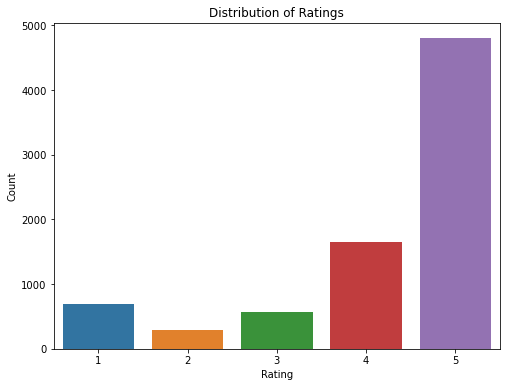

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Ratings', data=data_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [10]:
print(data_df.isnull().sum())

Reviewer_Name      0
Review_Title       0
Place_of_Review    0
Up_Votes           0
Down_Votes         0
Month              0
Review_text        0
Ratings            0
dtype: int64


In [11]:
print(data_df['Review_Title'].head())

0                 Nice product
1       Don't waste your money
2    Did not meet expectations
5        Mind-blowing purchase
6                    Must buy!
Name: Review_Title, dtype: object


In [12]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data_df['Review_Title']))

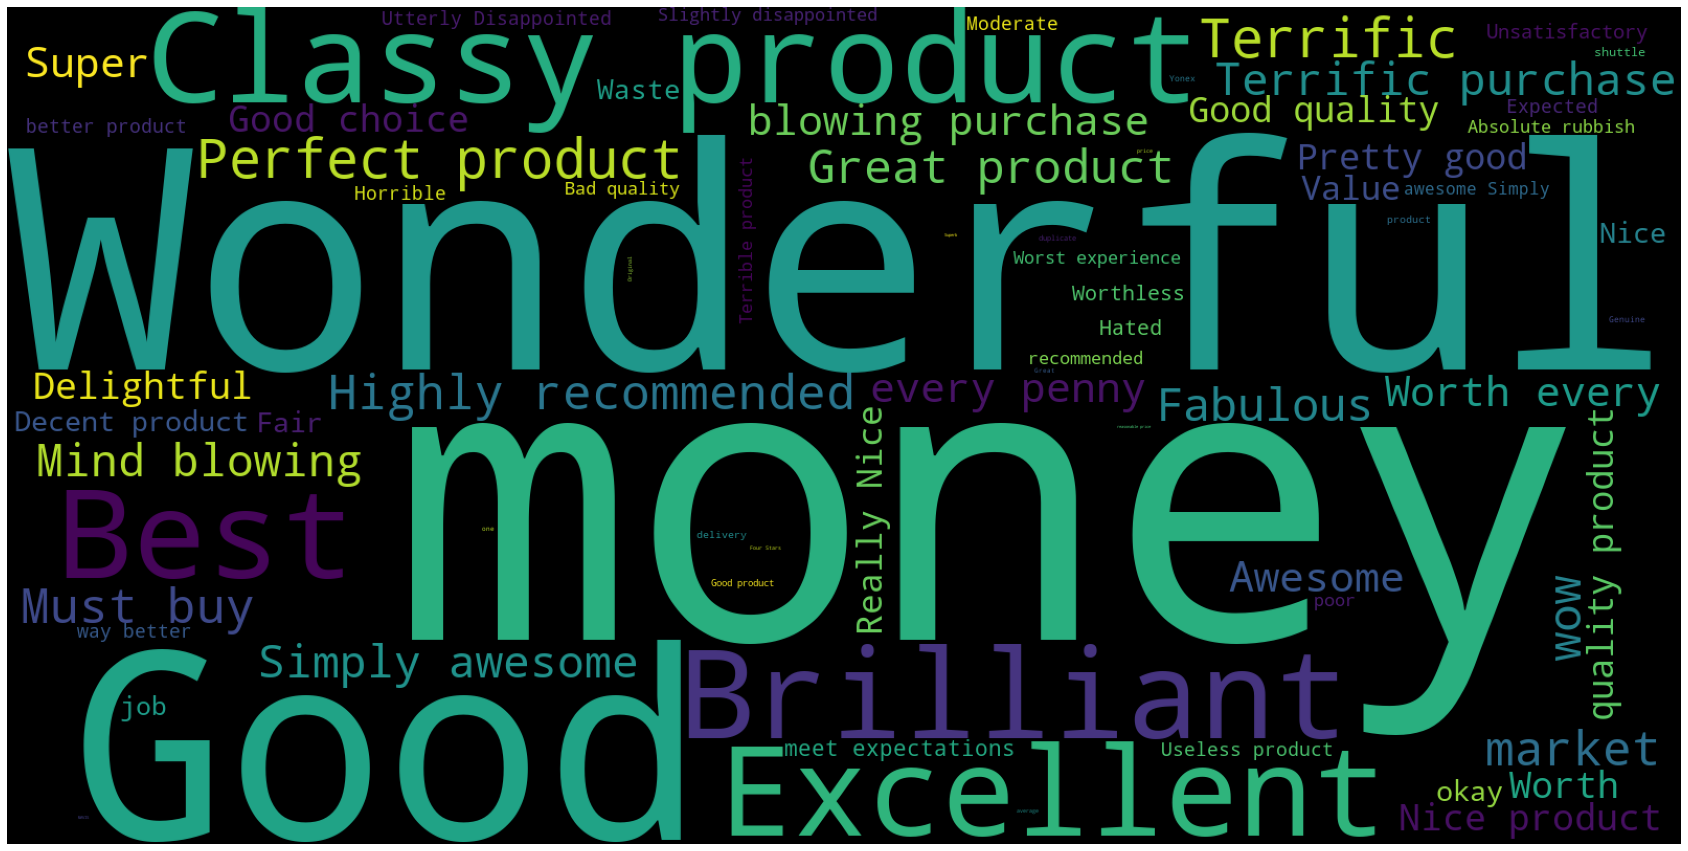

In [13]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [14]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data_df['Review_text']))

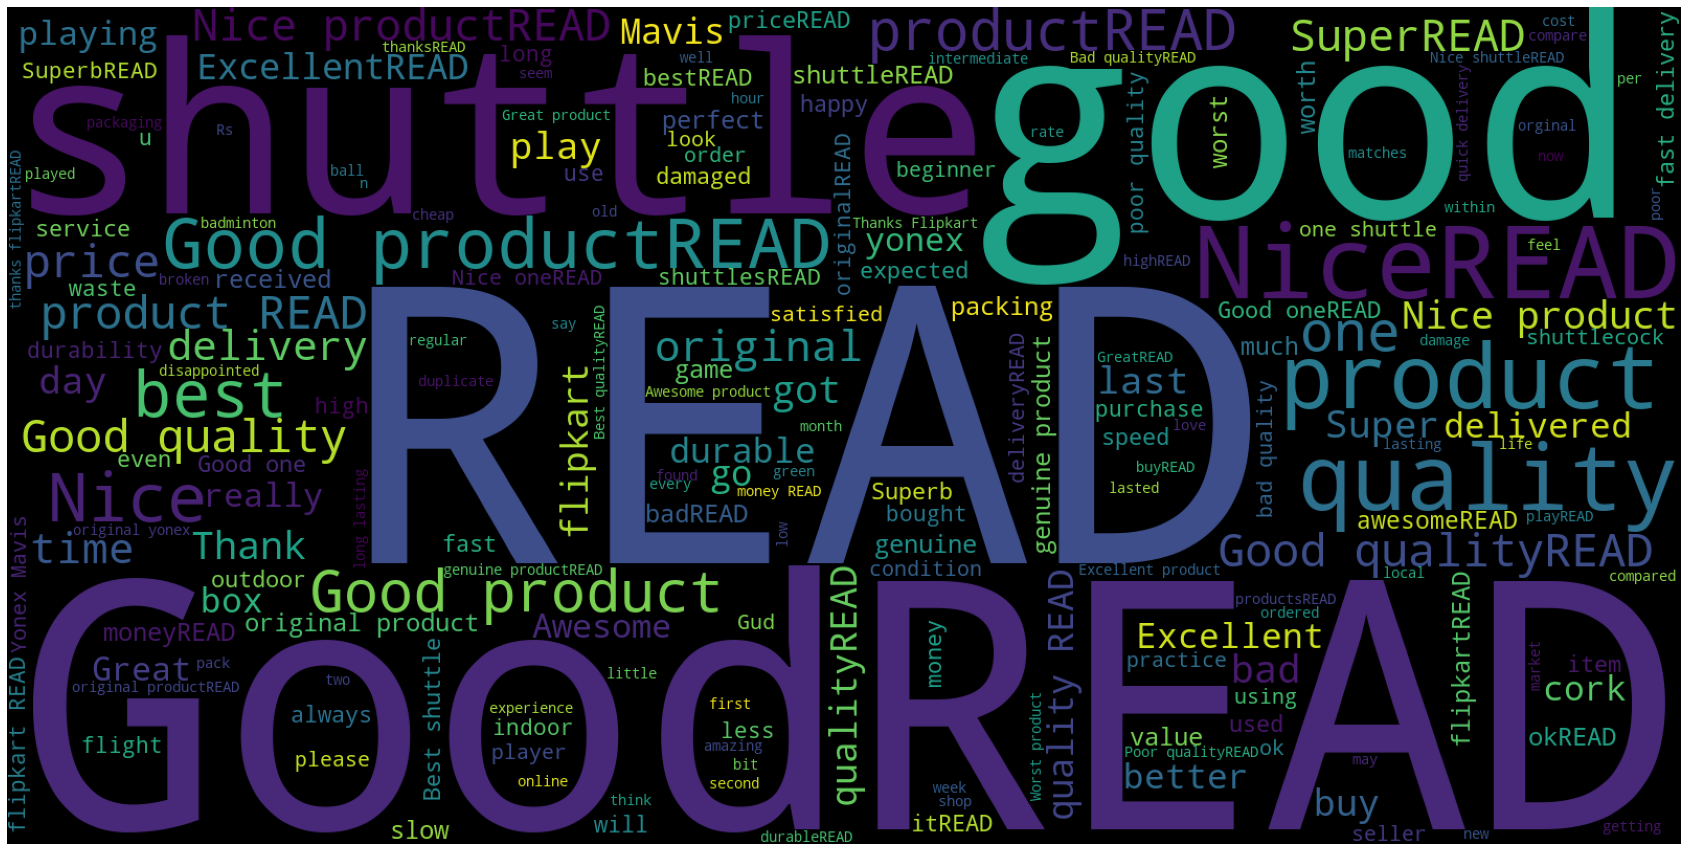

In [15]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

# 1 - Identify the input and the output

In [16]:
data_df.columns

Index(['Reviewer_Name', 'Review_Title', 'Place_of_Review', 'Up_Votes',
       'Down_Votes', 'Month', 'Review_text', 'Ratings'],
      dtype='object')

In [17]:
X = data_df['Review_text']

In [18]:
conditions = [(data_df['Ratings'] >= 4),  # Positive sentiment
              (data_df['Ratings'] <= 3),  # Negative sentiment
             ]
values = [1, 0]  # Labels for positive(1) and negative(0) sentiments

y = np.select(conditions, values)

y = pd.Series(y)

In [20]:
y.value_counts(normalize=True)

1    0.80644
0    0.19356
dtype: float64

In [21]:
X

0       Nice product, good quality, but price is now r...
1       They didn't supplied Yonex Mavis 350. Outside ...
2       Worst product. Damaged shuttlecocks packed in ...
5       Good quality product. Delivered on time.READ MORE
6       BEST PURCHASE It is a good quality and is more...
                              ...                        
8495    Thanks to the delivery boy ... Service is alwa...
8496    Over priced even after 50% discount price is m...
8497    Too much priced. It was getting me for Rs. 640...
8499    Hii flipkart customers care..why your delivery...
8507                         Nice delivery speedREAD MORE
Name: Review_text, Length: 8013, dtype: object

In [22]:
y

0       1
1       0
2       0
3       1
4       1
       ..
8008    1
8009    0
8010    0
8011    1
8012    1
Length: 8013, dtype: int64

# 2 - Split the data into train and test 

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

250     Product is good as like as bought in the open ...
7735                                  Love it...READ MORE
2805                                        GoodREAD MORE
4914                                       superREAD MORE
1539                                   excellentREAD MORE
Name: Review_text, dtype: object

In [24]:
X_train.shape

(6410,)

In [25]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6410,) (6410,)
(1603,) (1603,)


# 3 - Data Preprocessing on train data (X_train)

In [26]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [27]:
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rachusarang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rachusarang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/rachusarang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [28]:
## Lemmatizing

lemmatizer = WordNetLemmatizer()

In [29]:
def clean(doc):
    
    #doc = str(doc)
    
    # Removing special characters and digits
    doc = re.sub(r'[^a-zA-Z\s]', ' ', doc)
    
    # Remove HTML tags
    doc = re.sub(r'<.*?>', ' ', doc)
    
    #removing 'READMORE' from reviews
    doc = doc.replace("READ MORE", " ")
    
    # change sentence to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)
    
    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Remove punctuation and numbers.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    
    # Join and return
    return " ".join(filtered_tokens)

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rachusarang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=clean)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: user 1.88 s, sys: 73.6 ms, total: 1.95 s
Wall time: 2 s
(6410, 2086)


# 4 - Data Preprocessing on test data (X_test)

In [32]:
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(1603, 2086)


# 5 - Building a Model (i.e. Train the classifier)

In [33]:
# import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 2.65 ms, sys: 269 µs, total: 2.92 ms
Wall time: 2.83 ms


MultinomialNB()

# 6 - Evaluating on Train Data

In [34]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

Accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy: \t", Accuracy)

cm = metrics.confusion_matrix(y_train, y_train_pred)
print("Confusion metrics score: \n", cm)

Accuracy: 	 0.9006240249609985
Confusion metrics score: 
 [[ 726  508]
 [ 129 5047]]


Text(0.5, 15.0, 'Predicted')

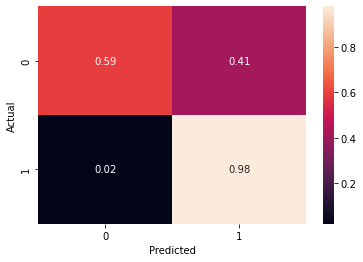

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_train, y_train_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

# 7 - Evaluate on Test Data

In [36]:
# make class predictions for X_test_dtm
y_test_pred = nb.predict(X_test_dtm)

Test_accuracy_score = metrics.accuracy_score(y_test, y_test_pred)
print(" Test Accuracy score: \t", Test_accuracy_score)

test_cm = metrics.confusion_matrix(y_test, y_test_pred)
print("Test confusion matrix:\n", test_cm)

 Test Accuracy score: 	 0.8883343730505302
Test confusion matrix:
 [[ 168  149]
 [  30 1256]]


Text(0.5, 15.0, 'Predicted')

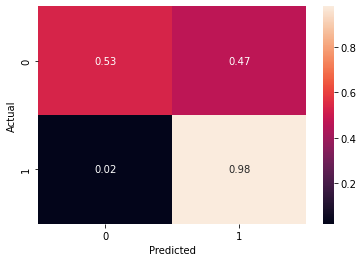

In [37]:
test_cm = metrics.confusion_matrix(y_test, y_test_pred)
actual = np.sum(test_cm, axis=1).reshape(-1, 1)
cmn = np.round(test_cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [38]:
# # Understand that accuracy is influenced in the presence of data imbalance
# # Let's change the metric to F1 Score

print("Train Score (F1 Score):", metrics.f1_score(y_train, y_train_pred))

print("Test Score (F1 Score):", metrics.f1_score(y_test, y_test_pred))

Train Score (F1 Score): 0.9406392694063926
Test Score (F1 Score): 0.9334819769602378


# Creating an Optimal Workflow

In [39]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [40]:
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ]
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [{'vectorization__preprocessor' : [clean],
                   'vectorization__max_features' : MAX_FEATURES, 
                   'nb__alpha' : ALPHA}]

clf = GridSearchCV(
    estimator=pipe, 
    param_grid=parameter_grid, 
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 49.9 s, sys: 2.75 s, total: 52.6 s
Wall time: 52.9 s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=2000,
                                 preprocessor=<function clean at 0x7fe07506f0d0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9334819769602378


# Caching to optimize the runtime

In [41]:
import warnings

warnings.filterwarnings('ignore')

In [42]:
import joblib
from joblib import Memory

import os

In [43]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__preprocessor': [clean],
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 27.9 s, sys: 1.5 s, total: 29.4 s
Wall time: 29.6 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization',
                 CountVectorizer(max_features=2000,
                                 preprocessor=<function clean at 0x7fe07506f0d0>)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9334819769602378


In [44]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, '/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/model_nb.pkl')

['/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/model_nb.pkl']

In [52]:
# Deserialization

model = joblib.load('/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/model_nb.pkl')

new_data = ["""Product is very promising"""]


prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [1]


In [46]:
# analysing the models prediction time and model size

%time y_test_pred = model.predict(X_test)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: user 254 ms, sys: 17.8 ms, total: 272 ms
Wall time: 272 ms
Test Score (F1): 0.9334819769602378


In [47]:
print("Model Size:", os.path.getsize('/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/model_nb.pkl'), "Bytes")


Model Size: 123399 Bytes


# Implementing Memoization to further improve the runtime


In [48]:
# Improving the efficiency by applying cleaning the text data before hand

%time X_train_clean = X_train.apply(lambda doc: clean(doc))

CPU times: user 892 ms, sys: 52.3 ms, total: 944 ms
Wall time: 944 ms


In [49]:
%time X_test_clean = X_test.apply(lambda doc: clean(doc))


CPU times: user 252 ms, sys: 17.2 ms, total: 269 ms
Wall time: 267 ms


In [50]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# Define the pipeline with caching
pipe = Pipeline(
    [
        ('vectorization', CountVectorizer()),
        ('nb', MultinomialNB())
    ], 
    memory=memory
)

MAX_FEATURES = [1000, 1500, 2000]
ALPHA = [1, 10]

# Observe the Key Value Pair format
parameter_grid = [
    {
        'vectorization__max_features': MAX_FEATURES,
        'nb__alpha': ALPHA
    }
]

clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

%time clf.fit(X_train_clean, y_train)

print("Best estimator found on train set")
print(clf.best_estimator_)
print()

print('Score on Test Data: ', clf.score(X_test_clean, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 1.5 s, sys: 14.3 ms, total: 1.51 s
Wall time: 1.53 s
Best estimator found on train set
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('nb', MultinomialNB(alpha=1))])

Score on Test Data:  0.9334819769602378


In [51]:
# Serialization

best_model = clf.best_estimator_

joblib.dump(best_model, 
            '/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/model_nb_unclean.pkl')


['/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/model_nb_unclean.pkl']

In [53]:
# Deserialization

model = joblib.load('/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/model_nb_unclean.pkl')

new_data = ["""One roll of corks
Only two piece of cork is good
But other four corks is waste
after one match corks rolling
So don't buy this product"""]


new_data_clean = [clean(doc) for doc in new_data]

prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [0]


Prediction - 1 means 'relevant' and 0 means 'not relevant'.

In [54]:
# Let's analyse the models prediction time and model size

%time y_test_pred = model.predict(X_test_clean)

print("Test Score (F1):", metrics.f1_score(y_test, y_test_pred))

CPU times: user 21.9 ms, sys: 1.87 ms, total: 23.8 ms
Wall time: 23 ms
Test Score (F1): 0.9334819769602378


In [55]:
print("Model Size:", os.path.getsize('/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/model_nb_unclean.pkl'), "Bytes")

Model Size: 123383 Bytes


#  Implementing various Algorithms to find the Best Model


In [56]:
from sklearn.svm import SVC

In [57]:
import warnings

warnings.filterwarnings('ignore')

In [58]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'svc': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory)
    
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'svc': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'poly', 'rbf','sigmoid']

        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 1.98 s, sys: 30.8 ms, total: 2.01 s
Wall time: 2.13 s
Score on Test Data:  0.9334819769602378
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 9.64 s, sys: 31.4 ms, total: 9.67 s
Wall time: 9.74 s
Score on Test Data:  0.9199557358908153
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 10min 51s, sys: 1.1 s, total: 10min 52s
Wall time: 10min 54s
Score on Test Data:  0.9110070257611241
********** svc **********
Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 6min 11s, sys: 1.04 s, total: 6min 12s
Wall time: 6min 13s
Score on Test Data:  0.9294942783314877


In [59]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1500)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

svc
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=1500)),
                ('classifier', SVC(C=1))])



In [60]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/{name}.pkl')
    model = joblib.load(f'/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test_clean)
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'/Users/rachusarang/Downloads/ILR/reviews_data_dump/Sentimentanalysis_badminton/{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: user 6.57 ms, sys: 61 µs, total: 6.63 ms
Wall time: 6.63 ms
Test Score (F1) 0.9334819769602378
Model Size: 123383 Bytes
********** decision_tree **********
CPU times: user 6.66 ms, sys: 98 µs, total: 6.76 ms
Wall time: 6.77 ms
Test Score (F1) 0.9199557358908153
Model Size: 93997 Bytes
********** logistic_regression **********
CPU times: user 5.48 ms, sys: 58 µs, total: 5.54 ms
Wall time: 5.45 ms
Test Score (F1) 0.9110070257611241
Model Size: 75498 Bytes
********** svc **********
CPU times: user 124 ms, sys: 224 µs, total: 124 ms
Wall time: 124 ms
Test Score (F1) 0.9294942783314877
Model Size: 321210 Bytes


clearly, the naive bayes model is the good fit